<a href="https://colab.research.google.com/github/vishakha0516/Customer-Analytics---Preparing-Data-For-Modeling-/blob/main/AI_Enabled_Executive_Decision_Support_%26_MIS_Analytics_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Enabled Executive Decision Support & MIS Analytics Platform

This project analyzes retail store sales data to generate business insights,
support executive decision-making, and predict future sales using AI.

**Tools Used:** Python, Pandas, Matplotlib, Scikit-learn  
**Domain:** MIS Analytics & Business Intelligence

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# try reading with proper encoding
df = pd.read_csv("store data.csv", encoding="latin1")

df.head()

Saving store data.csv to store data (2).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

## Key Business Metrics (KPIs)

We calculate important performance indicators:

- Total Sales
- Total Profit
- Total Orders

These metrics help management evaluate business performance.


In [9]:
total_sales = df['Sales'].sum()
total_sales

total_profit = df['Profit'].sum()
total_profit

total_orders = df['Order ID'].nunique()
total_orders

5009

## Regional Sales Analysis

This analysis identifies which states generate the highest revenue.

Business Value:
- Helps focus marketing efforts
- Supports regional expansion decisions

In [11]:
region_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
region_sales

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


## Top Selling Products

This section identifies the highest revenue-generating products.

Business Value:
- Helps inventory planning
- Improves demand forecasting

In [12]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products

,Sales
Product_Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


## Category Performance Analysis

This analysis compares sales across product categories.

Business Value:
- Identifies high-performing categories
- Supports product strategy decisions

In [13]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


## Monthly Sales Trend

This section analyzes sales trends over time.

Business Value:
- Identifies peak sales periods
- Detects seasonal demand patterns

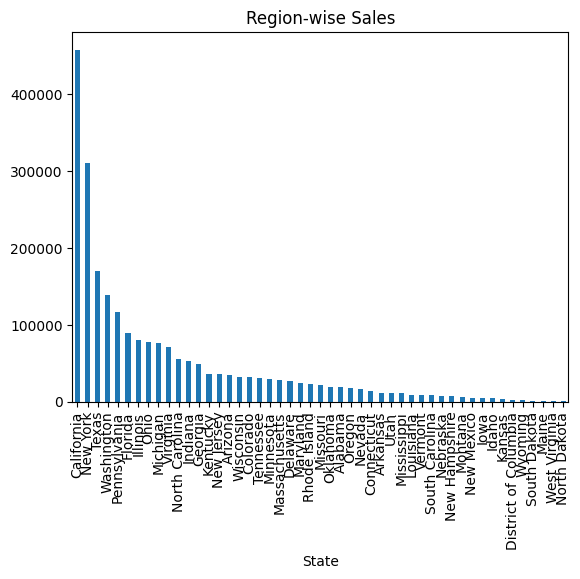

In [14]:
import matplotlib.pyplot as plt

region_sales.plot(kind='bar')
plt.title("Region-wise Sales")
plt.show()

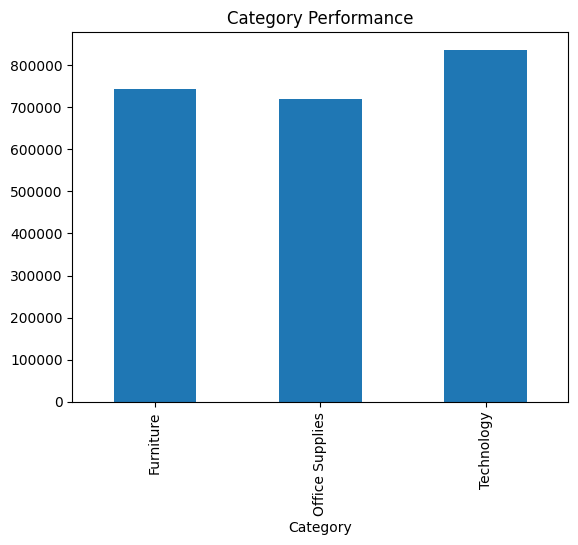

In [15]:
category_sales.plot(kind='bar')
plt.title("Category Performance")
plt.show()

/tmp/ipython-input-2260635111.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum()


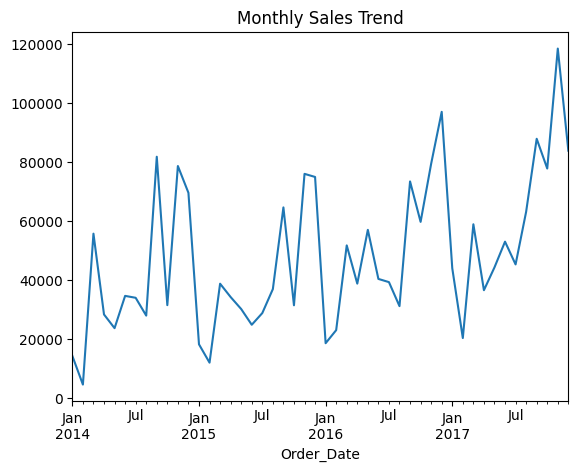

In [16]:
monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

## Sales Forecasting using Machine Learning

We use Linear Regression to predict future sales trends.

Business Value:
- Helps plan inventory and supply
- Supports financial forecasting
- Improves strategic planning

In [18]:
from sklearn.linear_model import LinearRegression

df['day_num'] = df['Order_Date'].map(pd.Timestamp.toordinal)

X = df[['day_num']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

future_df = pd.DataFrame([[df['day_num'].max()+30]], columns=['day_num'])
model.predict(future_df)

array([220.82876418])

Check Result

In [19]:
prediction = model.predict(future_df)
print("Predicted Sales for Next 30 Days:", round(prediction[0],2))

Predicted Sales for Next 30 Days: 220.83
